<a href="https://colab.research.google.com/github/spyrosviz/Sports_Event_Analysis/blob/main/Basketball/nba_shots_court.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/nba-analysis/playoff_shots.csv')
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,41700131,149,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,24,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-168,206,1,0,20180415,CLE,IND
1,Shot Chart Detail,41700131,153,2544,LeBron James,1610612739,Cleveland Cavaliers,1,1,5,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,3,1,1,0,20180415,CLE,IND
2,Shot Chart Detail,41700131,155,2544,LeBron James,1610612739,Cleveland Cavaliers,1,0,58,Missed Shot,Putback Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,-6,1,0,20180415,CLE,IND
3,Shot Chart Detail,41700131,187,2544,LeBron James,1610612739,Cleveland Cavaliers,2,11,8,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-8,13,1,1,20180415,CLE,IND
4,Shot Chart Detail,41700131,195,2544,LeBron James,1610612739,Cleveland Cavaliers,2,10,22,Made Shot,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,2,10,1,1,20180415,CLE,IND


In [ ]:
# Select specific player for shot analysis
player = 'Giannis Antetokounmpo'
df = df[df['PLAYER_NAME']==player].copy()
df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
5183,Shot Chart Detail,41700111,28,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,9,21,Made Shot,Driving Dunk Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-5,15,1,1,20180415,BOS,MIL
5184,Shot Chart Detail,41700111,44,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,7,43,Missed Shot,Step Back Jump shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,20,99,176,1,0,20180415,BOS,MIL
5185,Shot Chart Detail,41700111,134,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,0,0,Missed Shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,4,-29,32,1,0,20180415,BOS,MIL
5186,Shot Chart Detail,41700111,157,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,2,11,7,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-2,16,1,1,20180415,BOS,MIL
5187,Shot Chart Detail,41700111,161,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,2,10,43,Made Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,0,17,1,1,20180415,BOS,MIL


In [ ]:
# Set made shots locations
x_made = df['LOC_X'][df['EVENT_TYPE']=='Made Shot'].values
y_made = df['LOC_Y'][df['EVENT_TYPE']=='Made Shot'].values
# Set missed shots locations
x_missed = df['LOC_X'][df['EVENT_TYPE']=='Missed Shot'].values
y_missed = df['LOC_Y'][df['EVENT_TYPE']=='Missed Shot'].values

In [ ]:
# Function to draw basketball court
# Source for the function: https://github.com/savvastj/nbashots and https://github.com/hkair

def draw_court(ax=None, color="blue", lw=1, shotzone=False, outer_lines=False):
    """Returns an axes with a basketball court drawn onto to it.
    This function draws a court based on the x and y-axis values that the NBA
    stats API provides for the shot chart data.  For example the center of the
    hoop is located at the (0,0) coordinate.  Twenty-two feet from the left of
    the center of the hoop in is represented by the (-220,0) coordinates.
    So one foot equals +/-10 units on the x and y-axis.
    Parameters
    ----------
    ax : Axes, optional
        The Axes object to plot the court onto.
    color : matplotlib color, optional
        The color of the court lines.
    lw : float, optional
        The linewidth the of the court lines.
    outer_lines : boolean, optional
        If `True` it draws the out of bound lines in same style as the rest of
        the court.
    Returns
    -------
    ax : Axes
        The Axes object with the court on it.
    """
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -12.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    # Create the right side 3pt lines, it's 14ft long before it arcs
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    
    # Draw shotzone Lines
    # Based on Advanced Zone Mode
    if (shotzone == True):
        inner_circle = Circle((0, 0), radius=80, linewidth=lw, color='black', fill=False)
        outer_circle = Circle((0, 0), radius=160, linewidth=lw, color='black', fill=False)
        corner_three_a_x =  Rectangle((-250, 92.5), 30, 0, linewidth=lw, color=color)
        corner_three_b_x = Rectangle((220, 92.5), 30, 0, linewidth=lw, color=color)
        
        # 60 degrees
        inner_line_1 = Rectangle((40, 69.28), 80, 0, 60, linewidth=lw, color=color)
        # 120 degrees
        inner_line_2 = Rectangle((-40, 69.28), 80, 0, 120, linewidth=lw, color=color)
        
        # Assume x distance is also 40 for the endpoint
        inner_line_3 = Rectangle((53.20, 150.89), 290, 0, 70.53, linewidth=lw, color=color)
        inner_line_4 = Rectangle((-53.20, 150.89), 290, 0, 109.47, linewidth=lw, color=color)
        
        # Assume y distance is also 92.5 for the endpoint
        inner_line_5 = Rectangle((130.54, 92.5), 80, 0, 35.32, linewidth=lw, color=color)
        inner_line_6 = Rectangle((-130.54, 92.5), 80, 0, 144.68, linewidth=lw, color=color)
        
        
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc, inner_circle, outer_circle,
                          corner_three_a_x, corner_three_b_x,
                          inner_line_1, inner_line_2, inner_line_3, inner_line_4, inner_line_5, inner_line_6]
    else:
        # List of the court elements to be plotted onto the axes
        court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                          bottom_free_throw, restricted, corner_three_a,
                          corner_three_b, three_arc, center_outer_arc,
                          center_inner_arc]
    
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)
        

    return ax

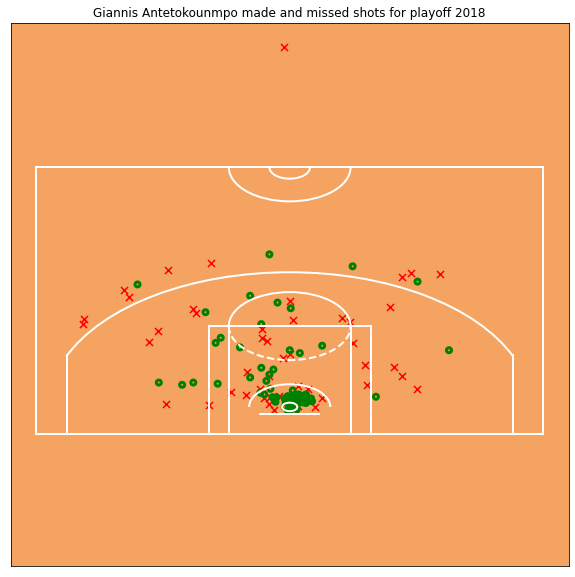

In [ ]:
fig, ax = plt.subplots(figsize=[10,10])
ax.set_facecolor('sandybrown')
# draws the court
draw_court(ax, color='white', lw=2, outer_lines=True)

# plot missed shots
ax.scatter(x_missed, y_missed, c='r', marker="x", s=50, linewidths=3)
# plot made shots
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker=".", s=100, linewidths=3)
ax.set_title(player + ' made and missed shots for playoff 2018')
ax.set_xticks([])
ax.set_yticks([])

plt.show()
